# K-Nearest Neighbors

## Introduction
There is no better way to learn Machine Learning than to experiment with it! In this notebook you are step by step guided to do this. Challenge yourself in trying to understand the code and try to change the parameters. You can re-use code and apply it to other datasets.

First things first, we need a few libraries.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.16.2
pandas version: 0.24.2
scikit-learn version: 0.24.1
matplotlib version: 3.0.3


The algorithm we are going to use is known as k-NN (k-Nearest Neighbors) classification.

## The supervised learning classification steps: overview

This notebook implements all specific tasks in applying supervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Dividing your data into a training and test set, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm 
* and Evaluating its results.

You will learn more on how to do each task in the weeks to come. For now, try to read the code and experiment with it.

## Step 1 Preparing the data
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected 3 very popular small datasets for you that are suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 
* Wine dataset (178 entries of 13 input features and 1 output label)
* Computer hardware dataset (209 entries of 9 input features and 1 output label)

Take a look at the website https://archive.ics.uci.edu/ml/datasets.html and find these datasets there. What information or metadata is available? List resources that explain the content of these dataset and that used these datasets to test learning algorithmns.

### Downloading

In [3]:
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df_machine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data")

Note that for the third dataset, the Computer hardware dataset, no code is given throughout the notebook. Learn how to change the parameters in the code to achieve a similar result.

df_machine.columns = ['vendor name', 'Model Name','']

### Exploring the iris dataset

In [4]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Exploring Wine dataset

In [5]:
df_wine.columns = ['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalnity of Ash', 'Magnesium', 'Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines', 'Proline']
print('Wine dataset shape: {}'.format(df_wine.shape))
df_wine.head(5)

Wine dataset shape: (177, 14)


,Class ID,Alcohol,Malic acid,Ash,Alcalnity of Ash,Magnesium,Total phonols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Exploring Computer hardware dataset

In [6]:
df_machine.columns = ['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
print('machine dataset shape: {}'.format(df_machine.shape))
df_machine.head(5)

machine dataset shape: (208, 10)


,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


## Analysing and visualising the data & cleaning the data

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N. N (# rows) represents the number of data points or entries, M (# columns) represents the number of features. If necessary, textual information should be removed or transformed into numerical data. 

#### Iris dataset

In [7]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species-id
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


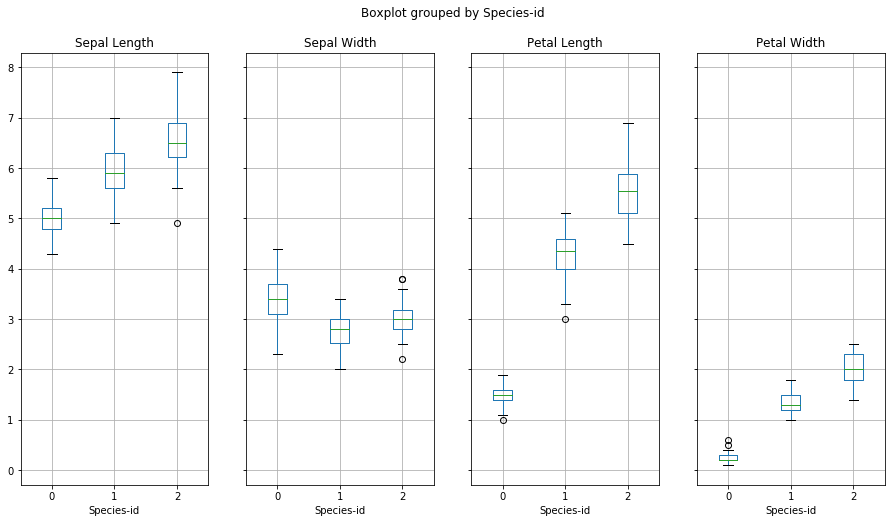

In [8]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,8), layout=(1,4));

#### Wine dataset

There is no need for cleaning the Wine dataset at this point.

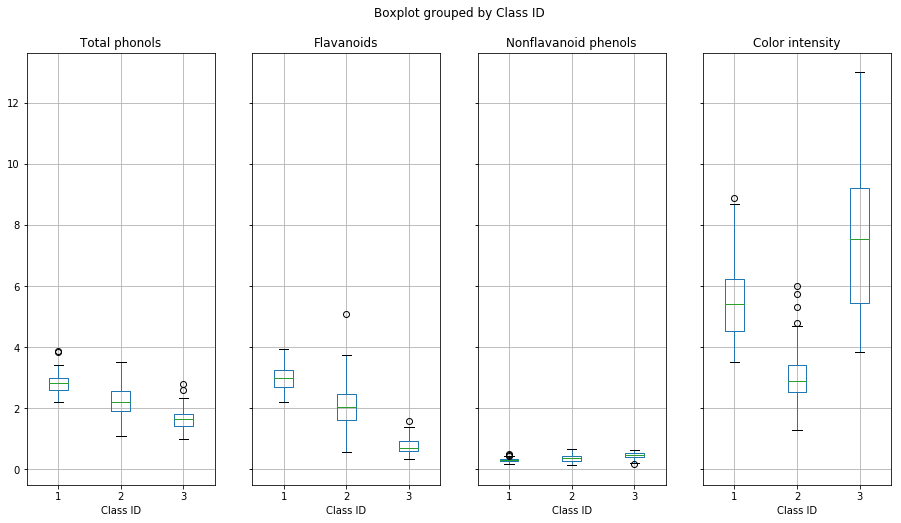

In [9]:
wine_features = ('Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Color intensity')
df_wine.boxplot(column=wine_features, by='Class ID', figsize=(15,8), layout=(1,4));

#### Computer hardware dataset

This step is a bit challenging because the column Vendor name contains text information. kNN, and all other learning algorithms that we will be studying, does not work on textual information.

To overcome this, one technique in data cleaning is to find all occurences of a particular string and replace it with a number. We will see later that there are other and better ways.

In [10]:
df_machine['Vendor id'] = df_machine['vendor name'].map({
    'adviser': 0, 'amdahl': 1,'apollo': 2, 'basf': 3, 'bti': 4, 'burroughs': 5, 
    'c.r.d': 6, 'cambex': 7, 'cdc': 8, 'dec': 9, 'dg': 10, 'formation': 11, 
    'four-phase': 12, 'gould': 13, 'honeywell': 14, 'hp': 15, 'harris': 16, 'ibm': 17, 
    'ipl': 18, 'magnuson': 19, 'microdata': 20, 'nas': 21, 'ncr': 22, 
    'nixdorf': 23, 'perkin-elmer': 24, 'prime': 25, 'siemens': 26, 
    'sperry': 27, 'sratus': 28, 'wang': 29
})

Tips to inspect this dataset:
* What can be a good column to predict?
* Select 2 columns that you think can predict your first column
* If there are more then three possible prediction values, select those 3 that are most common

In [11]:
# inspection of possible class column


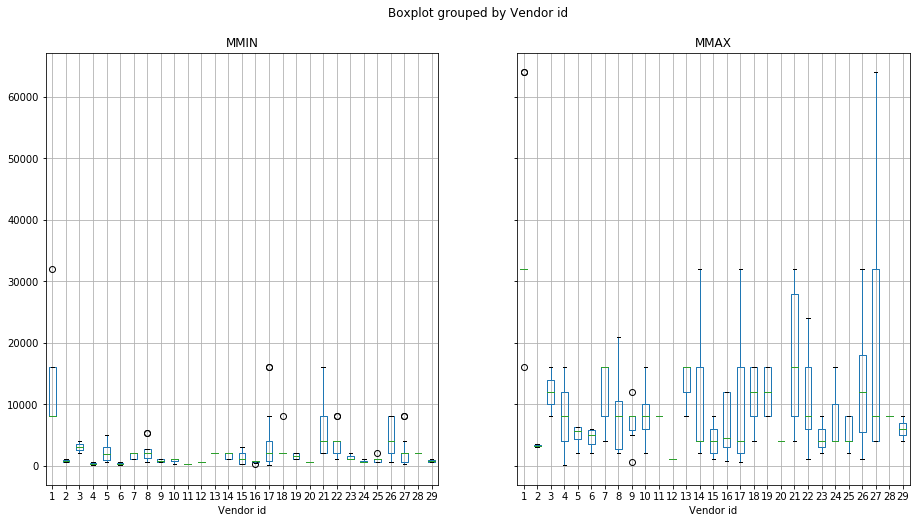

In [12]:
# inspection of possible feature columns
machine_features = tuple(df_machine.columns[3:5].values)
df_machine.boxplot(column=machine_features, by='Vendor id', figsize=(15,8), layout=(1,2));

## Selecting features (and scaling them)
We will scale each feature (linearly) between 0 and 10.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#### Iris dataset - step 3

Iris types: [0 1 2]
The length of X_iris: 149


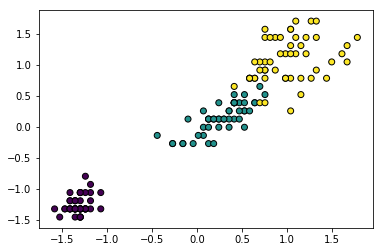

In [14]:
# Define X_iris and y_iris
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

#### Wine dataset - step 3

wine types: [1 2 3]
The length of X_wine: 177


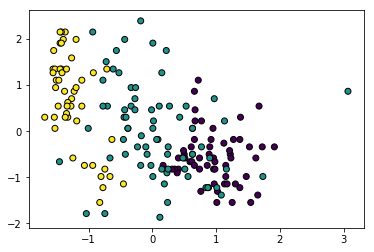

In [15]:
# Define X_wine and y_wine
X_wine = df_wine[['Flavanoids', 'Nonflavanoid phenols']]
y_wine = df_wine['Class ID']
print('wine types:', df_wine['Class ID'].unique())

# Normalize
scaler_wine = StandardScaler().fit(X_wine)
X_wine = scaler_wine.transform(X_wine)
print('The length of X_wine: {}'.format(len(X_wine)))

plt.scatter(X_wine[:,0], X_wine[:,1], edgecolors='k', c=y_wine)

#### Computer hardware dataset - step 3

classification possibilities: [ 1  2  3  4  5  6  8  7  9 10 11 12 13 15 16 14 17 18 19 20 21 22 23 24
 25 26 27 28 29]
The length of X_machine: 208


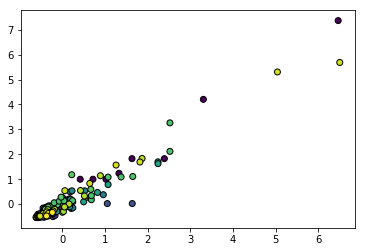

In [16]:
# Define X_machine and y_machine
X_machine = df_machine[['PRP','ERP']]
y_machine = df_machine['Vendor id']

print('classification possibilities:', y_machine.unique())

# Normalize
scaler_machine = StandardScaler().fit(X_machine)
X_machine = scaler_machine.transform(X_machine)
print('The length of X_machine: {}'.format(len(X_machine)))


# Scatter plot
plt.scatter(X_machine[:,0], X_machine[:,1], edgecolors='k', c=y_machine)

## Dividing your data into a training and test set

Let’s use the symbol X for the scaled 2D input feature array, and the symbol y for the 1D output label vector.
We will split the data into a train set and test set.

#### Iris dataset

Train shape: (111, 2) (111,)
Test shape: (38, 2) (38,)


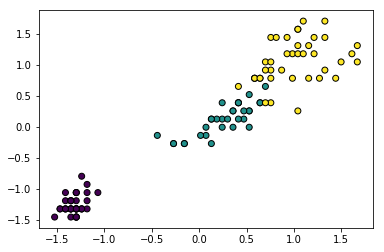

In [17]:
# Split in train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)
print('Train shape:', X_train_iris.shape, y_train_iris.shape)
print('Test shape:', X_test_iris.shape, y_test_iris.shape)

plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

#### Wine dataset

In [18]:
# Split in train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.25)
print('Train shape:', X_train_wine.shape, y_train_wine.shape)

Train shape: (132, 2) (132,)


#### Computer hardware dataset

Train shape: (156, 2) (156,)
Test shape: (52, 2) (52,)


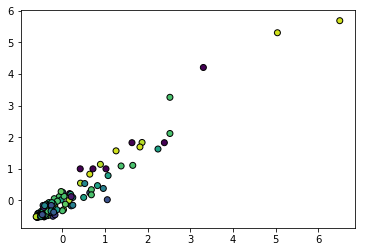

In [19]:
# Split in train and test sets
X_train_machine, X_test_machine, y_train_machine, y_test_machine = train_test_split(X_machine, y_machine, test_size=0.25)
print('Train shape:', X_train_machine.shape, y_train_machine.shape)
print('Test shape:', X_test_machine.shape, y_test_machine.shape)

plt.scatter(X_train_machine[:,0], X_train_machine[:,1], edgecolors='k', c=y_train_machine)

## Training your Machine learning algorithm

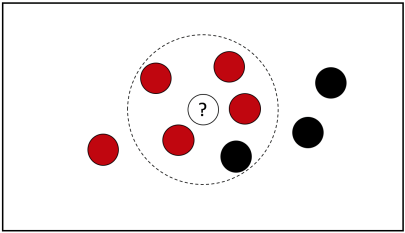
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from matplotlib.colors import ListedColormap

We create a function that takes the features and labels of the data as parameters, as the number of neighbors. We next predict the class for all possible values in the two dimensions. These results are plotted, visualising the decision boundaries between predicted classes.

In [21]:
def plot_nearest_neighbors(X_train, X_test, Y_train, Y_test, k, classlabels, featurelabels, weight):
    print('Number of training points: ',X_train.size)
    print('Number of training points: ',X_train.shape)
    possible_classes = Y_train.unique()
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    
    nb_of_classes = classlabels.unique().size
    
    h = .02  # step size in the mesh

    ## Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ## we create an instance of Neighbours Classifier and fit the data.
    clf_data = KNeighborsClassifier(k, weights=weight)
    clf_data.fit(X_train, Y_train)

    ## Plot the decision boundary. For that, we will assign a color to each
    ## possible point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z_data = clf_data.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z_data = Z_data.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z_data, cmap=cmap_light)

    ## Plot also the training points
    #print(Y_train)
    #print(X_train[0])

    for i in possible_classes:
        x1s_data = X_train[:, 0][Y_train.values == i]
        x2s_data = X_train[:, 1][Y_train.values == i]
        plt.scatter(x1s_data, x2s_data, cmap=cmap_bold, edgecolors='k', label=i)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-Class classification (k = %i, weights = '%s')" % (nb_of_classes, k, weight))
    plt.xlabel(featurelabels[0])
    plt.ylabel(featurelabels[1])
    plt.legend()
    plt.show()
        
    return clf_data         

#### Plotting the decision boundary for the Iris dataset

Number of training points:  222
Number of training points:  (111, 2)


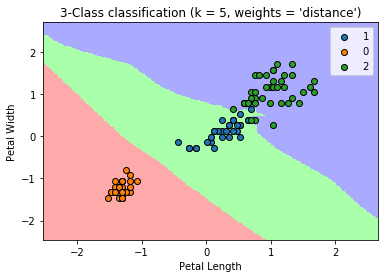

In [22]:
clf_iris = plot_nearest_neighbors(X_train_iris, X_test_iris, y_train_iris, y_test_iris, 5, df_iris.Species, ['Petal Length', 'Petal Width'], 'distance')


#### Plotting the decision boundary for the Wine dataset

Number of training points:  264
Number of training points:  (132, 2)


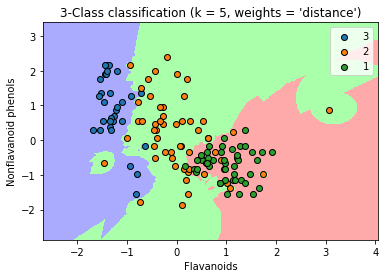

In [23]:
clf_wine = plot_nearest_neighbors(X_train_wine, X_test_wine, y_train_wine, y_test_wine, 5, df_wine['Class ID'], ['Flavanoids', 'Nonflavanoid phenols'], 'distance')

#### Plotting the decision boundary for the Computer hardware dataset

Number of training points:  312
Number of training points:  (156, 2)


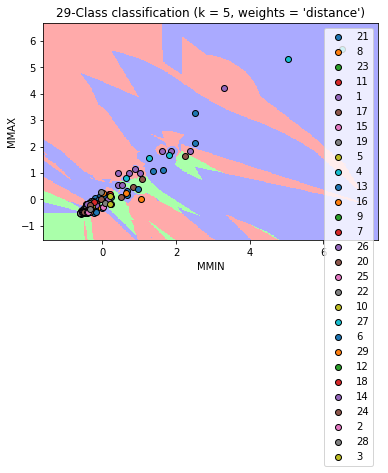

In [24]:
clf_machine = plot_nearest_neighbors(X_train_machine, X_test_machine, y_train_machine, y_test_machine, 5, df_machine['Vendor id'], ['MMIN', 'MMAX'], 'distance')

### Step 6 - Result of learning: accuracy
The accuracy of your KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [25]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [26]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

1.0

In [27]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        10
     class 1       1.00      1.00      1.00        17
     class 2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### Wine dataset

Copy the evaluation code above, and change it to calculate it for the wine dataset.

Advanced: make a function of the accurancy code and apply to the machine dataset.

In [28]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_wine.size)
y_pred_wine = clf_wine.predict(X_test_wine)
metrics.accuracy_score(y_test_wine, y_pred_wine)

from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test_wine, y_pred_wine, target_names=target_names))

Number of test points:  90
              precision    recall  f1-score   support

     class 1       0.50      0.42      0.45        12
     class 2       0.56      0.56      0.56        16
     class 3       0.89      1.00      0.94        17

    accuracy                           0.69        45
   macro avg       0.65      0.66      0.65        45
weighted avg       0.67      0.69      0.68        45



In [29]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_machine.size)
y_pred_machine = clf_machine.predict(X_test_machine)
metrics.accuracy_score(y_test_machine, y_pred_machine)

from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test_machine, y_pred_machine, target_names=target_names))

Number of test points:  104


ValueError: Number of classes, 21, does not match size of target_names, 3. Try specifying the labels parameter